# Analysis of 2025 Booth Signups Per Troop

This notebook loads the source CSV file located at `data/2025_booth_signup_unit.csv` and performs general data analytics with a focus on summarizing booth signups per troop. The steps include:

- Loading the data into a pandas DataFrame
- Inspecting and cleaning the data as needed
- Aggregating booth signups per troop (total, count, average, min, and max)
- Saving the aggregated summary to a new CSV file
- Creating some visualizations for additional insights

> **Note:** This notebook assumes that the CSV file does not have a header. We will assign column names manually. Adjust the list of column names so that it exactly matches the number and order of columns in your CSV file.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set up display options and style
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

## 1. Load the Data

Load the CSV file from `data/2025_booth_signup_unit.csv`. In this example, we assume the file has no header so we pass `header=None`.

In [4]:
# Specify the path to the data file
data_file = 'data/2025_booth_signup_unit.csv'

# Load the CSV file (adjust header settings if your CSV already has headers)
df = pd.read_csv(data_file, header=None)

# Print the shape and first few rows
print("Data shape:", df.shape)
df.head()

Data shape: (517, 26)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,East Chandler (670) Booth Sale Signups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Filtered for Troops in SU East Chandler (670),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona Cactus-Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Feb 1, 2025 at 05:29PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-25 Sales Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Define Column Names

The data file appears to have 26 columns. Update the list below to match the columns in your file. In this example, we assume the columns include details such as name, address, event date/times, troop ID, booth signups, etc.

In [5]:
# Verify the number of columns in the DataFrame
num_columns = len(df.columns)
print("Number of columns:", num_columns)

# Define a list of column names that matches the number of columns (26 in this example)
column_names = [
    "Name", "Address", "Address2", "Door", "City", "State", "Zip", "Blank1", 
    "Phone", "Email", "Blank2", "Blank3", "EventDate", "StartTime", "EndTime", 
    "Duration", "Avail_Slots", "TroopID", "X", "TroopContact", "T1", "T2", "T3", 
    "T4", "BoothSignups", "Extra"
]

if len(column_names) != num_columns:
    raise ValueError(f"Column names list has {len(column_names)} names but DataFrame has {num_columns} columns.")

# Assign the column names to the DataFrame
df.columns = column_names

# Show the first few rows with new column names
df.head()

Number of columns: 26


,Name,Address,Address2,Door,City,State,Zip,Blank1,Phone,Email,Blank2,Blank3,EventDate,StartTime,EndTime,Duration,Avail_Slots,TroopID,X,TroopContact,T1,T2,T3,T4,BoothSignups,Extra
0,East Chandler (670) Booth Sale Signups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Filtered for Troops in SU East Chandler (670),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona Cactus-Pine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Feb 1, 2025 at 05:29PM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-25 Sales Season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Cleaning and Preparation

Next, we perform some basic cleaning:

- Convert the `BoothSignups` column to numeric (using 0 for missing or invalid entries).
- Convert `TroopID` to string, if needed, to ensure consistent grouping.

In [6]:
# Convert BoothSignups to numeric (coerce errors to NaN, then fill with 0)
df['BoothSignups'] = pd.to_numeric(df['BoothSignups'], errors='coerce').fillna(0)

# Convert TroopID to string for grouping
df['TroopID'] = df['TroopID'].astype(str)

# Show DataFrame info to verify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          20 non-null     object 
 1   Address       56 non-null     object 
 2   Address2      1 non-null      object 
 3   Door          1 non-null      object 
 4   City          56 non-null     object 
 5   State         56 non-null     object 
 6   Zip           56 non-null     object 
 7   Blank1        1 non-null      object 
 8   Phone         53 non-null     object 
 9   Email         53 non-null     object 
 10  Blank2        1 non-null      object 
 11  Blank3        119 non-null    object 
 12  EventDate     267 non-null    object 
 13  StartTime     267 non-null    object 
 14  EndTime       267 non-null    object 
 15  Duration      267 non-null    object 
 16  Avail_Slots   267 non-null    object 
 17  TroopID       517 non-null    object 
 18  X             511 non-null    

## 4. General Data Exploration

Let's check some general statistics and the distribution of events per troop.

In [7]:
# Print basic descriptive statistics for numeric columns
print(df.describe())

# Count of events per Troop (based on TroopID)
events_per_troop = df['TroopID'].value_counts().sort_index()
print("\nNumber of events per Troop:")
print(events_per_troop)

       BoothSignups
count         517.0
mean            0.0
std             0.0
min             0.0
25%             0.0
50%             0.0
75%             0.0
max             0.0

Number of events per Troop:
TroopID
2554     11
2570      1
2603      3
2626      5
2674      8
2820     22
2877     20
3065     18
3296     16
3312      6
3315     19
3475     29
3630     13
3799      8
3819     19
3822     59
3824     16
3827      3
3828     10
3829     85
3839     31
3997     16
4208     11
7223      9
872      68
9670      4
Troop     1
nan       6
Name: count, dtype: int64


## 5. Aggregation: Booth Signups Per Troop

Now we aggregate the data on a per-troop basis. For each troop we calculate:

- **Total_Booth_Signups:** Sum of booth signups across events
- **Number_of_Booths:** Count of events for that troop
- **Average_Booth_Signups:** Mean signups per event
- **Min_Booth_Signups:** Minimum signups in an event
- **Max_Booth_Signups:** Maximum signups in an event

In [8]:
agg_troops = df.groupby("TroopID")["BoothSignups"].agg(
    Total_Booth_Signups="sum",
    Number_of_Booths="count",
    Average_Booth_Signups="mean",
    Min_Booth_Signups="min",
    Max_Booth_Signups="max"
).reset_index()

# Round the average to one decimal place
agg_troops["Average_Booth_Signups"] = agg_troops["Average_Booth_Signups"].round(1)

# Sort the result by TroopID and display the summary
agg_troops.sort_values("TroopID", inplace=True)
agg_troops

,TroopID,Total_Booth_Signups,Number_of_Booths,Average_Booth_Signups,Min_Booth_Signups,Max_Booth_Signups
0,2554,0.0,11,0.0,0.0,0.0
1,2570,0.0,1,0.0,0.0,0.0
2,2603,0.0,3,0.0,0.0,0.0
3,2626,0.0,5,0.0,0.0,0.0
4,2674,0.0,8,0.0,0.0,0.0
5,2820,0.0,22,0.0,0.0,0.0
6,2877,0.0,20,0.0,0.0,0.0
7,3065,0.0,18,0.0,0.0,0.0
8,3296,0.0,16,0.0,0.0,0.0
9,3312,0.0,6,0.0,0.0,0.0


## 6. Save the Aggregated Data to CSV

We now save our aggregated troop summary to a CSV file called `booth_signups_per_troop_summary.csv`.

In [9]:
output_file = "booth_signups_per_troop_summary.csv"
agg_troops.to_csv(output_file, index=False)
print(f"Aggregated troop data saved to {output_file}")

Aggregated troop data saved to booth_signups_per_troop_summary.csv


## 7. Visualizations (Optional)

Below is an example bar chart showing total booth signups per troop.

/tmp/ipykernel_134872/3275511071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="TroopID", y="Total_Booth_Signups", data=agg_troops, palette="viridis")


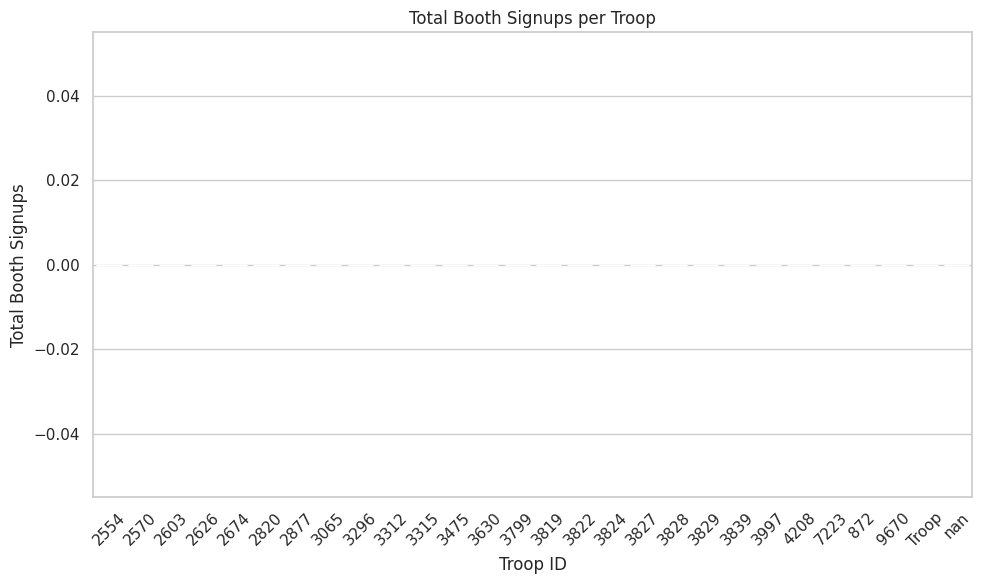

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x="TroopID", y="Total_Booth_Signups", data=agg_troops, palette="viridis")
plt.title("Total Booth Signups per Troop")
plt.xlabel("Troop ID")
plt.ylabel("Total Booth Signups")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Additional Analytics: Distribution of Booth Signups

The following plot shows the distribution of booth signups across all events.

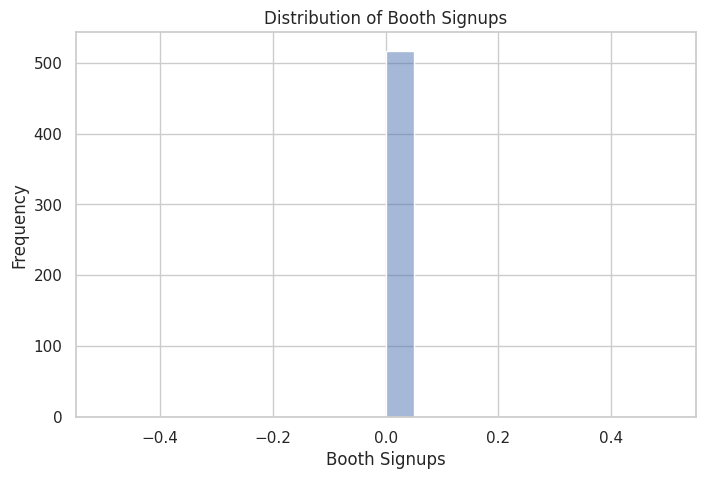

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['BoothSignups'], bins=20, kde=True)
plt.title("Distribution of Booth Signups")
plt.xlabel("Booth Signups")
plt.ylabel("Frequency")
plt.show()

## Conclusion

In this notebook we have:

- Loaded and cleaned the source data from `data/2025_booth_signup_unit.csv`
- Aggregated booth signup data on a per-troop basis (total, count, average, min, and max)
- Saved the aggregated data to `booth_signups_per_troop_summary.csv`
- Provided visualizations for additional insights

Feel free to modify or expand the analysis to suit your reporting needs.